### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Adatok generálása

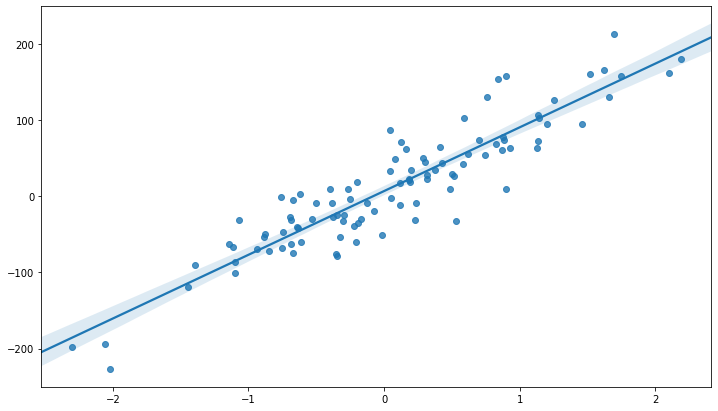

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=1, noise=35) 

plt.figure(figsize=(12, 7))
sns.regplot(x=X, y=y)

In [3]:
X = X.reshape(len(X))
X.shape

(100,)

In [4]:
stats.linregress(X, y)

LinregressResult(slope=83.81498409099675, intercept=7.094550360837991, rvalue=0.9186137332271441, pvalue=2.658773408320866e-41, stderr=3.64204270192075)

### Gradient descent

In [5]:
def gradient_descent(iterations, alpha):
    n = len(y)
    b0 = 0                         #b0 kezdeti értéke
    b1 = 0                         #b1 kezdeti értéke
    
    for i in range(iterations):
        y_kalap = b0 + b1*X        #y_kalap értéke: b0 + b1*X
        hiba = y_kalap - y         #hiba értéke:    y - y_kalap
        Db0 = (2/n)*np.sum(hiba)         #hiba deriváltja b0-ra nézve = delta b0
        Db1 = (2/n)*np.sum(X*hiba)       #hiba deriváltja b1-ra nézve = delta b1
        
        b0 -= Db0*alpha            #b0 = b0 + (delta b0)*alpha
        b1 -= Db1*alpha            #b1 = b1 + (delta b1)*alpha
        
    return b0, b1

In [6]:
b0, b1 = gradient_descent(100000, 0.0001)
print('B0: ', b0, ', B1: ', b1)

B0:  7.0945543781466025 , B1:  83.81496874963163


### B0 és B1 együtthatók

In [7]:
b0, b1 = gradient_descent(1000, 0.0001)
print('B0: ', b0, ', B1: ', b1)

B0:  2.1352783685461314 , B1:  12.276707199112874


### Ábrázolás

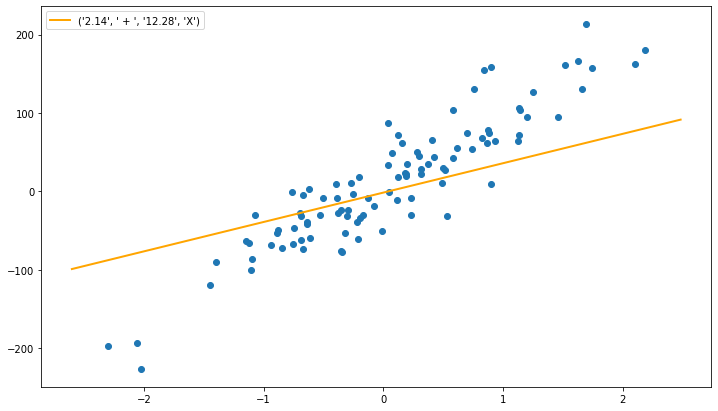

In [8]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y)

x_vonal = np.linspace(np.min(X)-0.3, np.max(X)+0.3, 2)
y_vonal = -1.7736893111147884 + 37.49474506039381*x_vonal
plt.plot(x_vonal, y_vonal, c='orange', linewidth=2, label=('{0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
plt.legend()
plt.show()

### Prediction

In [9]:
def lin_predict(x):
    print(b0 + b1*x)
    
lin_predict(2)

26.68869276677188


###   
### Sklearn SGDRegressor

In [10]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor

clf = linear_model.SGDRegressor(max_iter=10000, tol=1e-3)
clf.fit(X.reshape(-1, 1), y)
model = SGDRegressor()
model.fit(X.reshape(-1, 1), y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [11]:
print('B0: ', model.intercept_, ', B1: ', model.coef_)

B0:  [7.07341526] , B1:  [83.80733346]


###   
###   
### Többváltozós

In [12]:
X2 = 10*X

X_df = pd.DataFrame(X2, X)
X_df.reset_index(inplace=True)
X_df.columns=('iksz', 'iksz2')

In [13]:
def gradient_descent_több(iterations, alpha):
    n = len(y)
    b0 = 0                         #b0 kezdeti értéke
    b1 = 0                         #b1 kezdeti értéke
    b2 = 0
    
    for i in range(iterations):
        y_kalap = b0 + b1*X +b2*X2 #y_kalap értéke: b0 + b1*X
        hiba = y_kalap - y         #hiba értéke:    y - y_kalap
        Db0 = (2/n)*np.sum(hiba)         #hiba deriváltja b0-ra nézve = delta b0
        Db1 = (2/n)*np.sum(X*hiba)       #hiba deriváltja b1-ra nézve = delta b1
        Db2 = (2/n)*np.sum(X2*hiba)
        
        b0 -= Db0*alpha            #b0 = b0 + (delta b0)*alpha
        b1 -= Db1*alpha            #b1 = b1 + (delta b1)*alpha
        b2 -= Db2*alpha
        
    return b0, b1, b2

In [14]:
b0, b1, b2 = gradient_descent_több(10000, 0.0001)
print('B0: ', b0, ', B1: ', b1, ', B2: ', b2)

B0:  6.134381555103529 , B1:  0.8305922580987153 , B2:  8.30592258098719


###   
### Másik módszer

In [15]:
def cost_function(X, y, B):
    error = np.sum((X.dot(B) - y) ** 2) / (2*len(y))  #SUM[ (y_kalap_i - y_tényleges_i)^2  /  2 * len(y) ]
    
    return error

In [16]:
def gradient_descent(X, y, B, alpha, iterations):
    cost_history = [0] * iterations
 
    for i in range(iterations):
        y_kalap = X.dot(B)
        loss = y_kalap - y
        gradient = X.T.dot(loss) / len(y)     #Gradient kiszámolása
        B = B - (alpha * gradient)            #B értékének módosítása
        hiba = cost_function(X, y, B)         #Hiba újraszámolása
        cost_history[i] = hiba

    return B, cost_history

In [17]:
train_n = 70
elso_n_feature = 2

X_train = X_df.iloc[:train_n,: elso_n_feature]
X_train = np.c_[np.ones(train_n, dtype='int64'), X_train]

y_train = y[:train_n]

X_test = X_df.iloc[train_n:, :elso_n_feature]
X_test = np.c_[np.ones(len(X_test), dtype='int64'), X_test]

y_test = y[train_n:]

In [18]:
B = np.zeros(X_train.shape[1])  #B vektor feltöltése 0 kezdőértékekkel

In [19]:
alpha = 0.0001               #Gradient descent tanulási sebessége
iter_n = 10000               #Gradient descent iterációinak száma

B_együtthatok, cost_history = gradient_descent(X_train, y_train, B, alpha, iter_n)

#### Együtthatók (B0, B1, B2)

In [20]:
B_együtthatok

array([5.06274572, 0.78493971, 7.84939712])

#### prediction

In [21]:
def pred(x_test, B_együtthatok):
    return x_test.dot(B_együtthatok)

y_predicted = pred(X_test, B_együtthatok)
y_predicted

array([-109.42502406,  -12.5631873 ,  133.83907715,   53.99393609,
        -49.41555758,   11.19418211,    4.05871011,  -45.57510537,
         94.94675237,  143.38952219,   76.53987616, -158.26296613,
         23.64696695,   -8.60717479,   14.72060341,   95.81519477,
         -4.67985753,  -54.17115012,   27.70379784, -155.25516439,
         23.30440575,  -16.17512949,  -36.8101356 ,   94.60699987,
         20.19831742,  -18.56972961,  136.6500547 ,    8.51905705,
          8.40940558,  -10.14576796])

###   
### Sklearn

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_df, y)
print('R^2: ', reg.score(X_df, y))
print('B0 :', reg.intercept_)
print('Bi :', reg.coef_)

R^2:  0.8438511908735105
B0 : 7.094550360837996
Bi : [0.82985133 8.29851328]
